<a href="https://colab.research.google.com/github/beryl09/beryl09/blob/main/Ps2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Area of interest:**

Analyze Effects of rate of  school dropouts in colorado counties


**Importing Modules**

In [ ]:
import os, zipfile
import pandas as pd
import matplotlib.pyplot as plt

import geopandas as gpd

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

**Importing map modules for ploting maps**

In [ ]:
!pip install mapclassify
import mapclassify

** Importing a shapefile from drive and assigning a variable**

In [ ]:
! wget -q -O a.zip https://github.com/beryl09/beryl09/raw/main/Colorado_County_Boundaries.zip

In [ ]:
zip_ref = zipfile.ZipFile('a.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping


<Axes: >

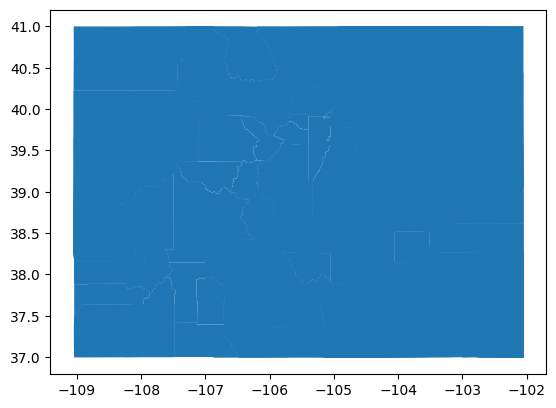

In [ ]:
# make a map
colc.plot()

In [ ]:
!ls

 a.zip
 Colorado_County_Boundaries.cpg
 Colorado_County_Boundaries.dbf
 Colorado_County_Boundaries.prj
 Colorado_County_Boundaries.shp
 Colorado_County_Boundaries.shx
 col.zip
'Marijuana_Use_in_Adults_-_CDPHE_Community_Level_Estimates_(Census_Tract).csv'
 sample_data
 schools.xlsx


In [ ]:
colc=gpd.read_file('Colorado_County_Boundaries.shp') #load the shapefile with gpd as colc

In [ ]:
! wget -q -O schools.xlsx https://github.com/beryl09/beryl09/raw/main/2021-2022_Dropout%20Rates%20by%20School%20and%20Race_Ethnicity.xlsx

In [ ]:
colc.dtypes  #with geopandas can do stuff like with pandas :)

OBJECTID        int64
COUNTY         object
FULL           object
LABEL          object
CNTY_FIPS      object
NUM_FIPS        int64
CENT_LAT      float64
CENT_LONG     float64
US_FIPS        object
geometry     geometry
dtype: object

In [ ]:
data_var =['DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE SCHOOLS)']

In [ ]:
sch=pd.read_excel('/content/schools.xlsx') #load the schools xlsx file

In [ ]:
sch.head(5)

,County Name,Organization Code,Organization Name,School Code,School Name / Category (include or exclude alternative schools),Total Pupil Count,Total Dropouts,Total Dropout Rate,Female Total Pupil Count,Female Total Dropouts,...,Two or More Races Pupil Count,Two or More Races Dropouts,Two or More Races Dropout Rate,Two or More Races Female Pupil Count,Two or More Races Female Dropouts,Two or More Races Female Dropout Rate,Two or More Races Male Pupil Count,Two or More Races Male Dropouts,Two or More Races Male Dropout Rate,School Closed Note
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,9999.0,STATE TOTAL,9999,STATE GRAND TOTALS (ALTERNATIVE SCHOOLS ONLY),29647.0,4990.0,0.168,14037.0,2222.0,...,1231.0,211.0,0.171,609.0,102.0,0.167,622.0,109.0,0.175,
2,,9999.0,STATE TOTAL,9999,STATE GRAND TOTALS (EXCLUDING ALTERNATIVE SCHO...,446579.0,5534.0,0.012,218286.0,2132.0,...,20319.0,256.0,0.013,9973.0,91.0,0.009,10346.0,165.0,0.016,
3,,9999.0,STATE TOTAL,9999,STATE GRAND TOTALS (INCLUDING ALTERNATIVE SCHO...,476226.0,10524.0,0.022,232323.0,4354.0,...,21550.0,467.0,0.022,10582.0,193.0,0.018,10968.0,274.0,0.025,
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
sch['School Name / Category (include or exclude alternative schools)'].value_counts()

DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE SCHOOLS)    185
DISTRICT GRAND TOTALS (EXCLUDING ALTERNATIVE SCHOOLS)    185
DISTRICT GRAND TOTALS (ALTERNATIVE SCHOOLS ONLY)         185
SUMMER SCHOOL DROPOUTS (NONE)                            177
SUMMER SCHOOL DROPOUTS                                     8
                                                        ... 
Dora Moore ECE-8 School                                    1
Morey Middle School                                        1
Noel Community Arts School                                 1
North High School Engagement Center                        1
Yampah Mountain School                                     1
Name: School Name / Category (include or exclude alternative schools), Length: 979, dtype: int64

In [ ]:
schTot=sch[sch['School Name / Category (include or exclude alternative schools)']=='DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE SCHOOLS)']

In [ ]:
schTot


,County Name,Organization Code,Organization Name,School Code,School Name / Category (include or exclude alternative schools),Total Pupil Count,Total Dropouts,Total Dropout Rate,Female Total Pupil Count,Female Total Dropouts,...,Two or More Races Pupil Count,Two or More Races Dropouts,Two or More Races Dropout Rate,Two or More Races Female Pupil Count,Two or More Races Female Dropouts,Two or More Races Female Dropout Rate,Two or More Races Male Pupil Count,Two or More Races Male Dropouts,Two or More Races Male Dropout Rate,School Closed Note
22,ADAMS,10.0,Mapleton 1,9998,DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE S...,5547.0,159.0,0.029,2821.0,76.0,...,176.0,7.0,0.040,91.0,4.0,0.044,85.0,3.0,0.035,
48,ADAMS,20.0,Adams 12 Five Star Schools,9998,DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE S...,19532.0,482.0,0.025,9424.0,173.0,...,841.0,8.0,0.010,421.0,2.0,0.005,420.0,6.0,0.014,
56,ADAMS,30.0,Adams County 14,9998,DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE S...,3432.0,247.0,0.072,1638.0,88.0,...,25.0,2.0,0.080,7.0,0.0,0.000,18.0,2.0,0.111,
76,ADAMS,40.0,School District 27J,9998,DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE S...,10341.0,135.0,0.013,5072.0,58.0,...,357.0,5.0,0.014,174.0,3.0,0.017,183.0,2.0,0.011,
82,ADAMS,50.0,Bennett 29J,9998,DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE S...,693.0,6.0,0.009,332.0,1.0,...,39.0,0.0,0.000,18.0,0.0,0.000,21.0,0.0,0.000,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,COLORADO BOCS,9035.0,Centennial BOCES,9998,DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE S...,210.0,77.0,0.367,84.0,29.0,...,3.0,2.0,0.667,1.0,0.0,0.000,2.0,2.0,1.000,
1704,COLORADO BOCS,9050.0,San Juan BOCES,9998,DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE S...,80.0,0.0,0.000,44.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.000,
1709,COLORADO BOCS,9130.0,Expeditionary BOCES,9998,DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE S...,192.0,0.0,0.000,81.0,0.0,...,15.0,0.0,0.000,5.0,0.0,0.000,10.0,0.0,0.000,
1721,COLORADO BOCS,9170.0,Education reEnvisioned BOCES,9998,DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE S...,3368.0,108.0,0.032,1770.0,50.0,...,231.0,8.0,0.035,113.0,1.0,0.009,118.0,7.0,0.059,


In [ ]:
schTot.dtypes

County Name                                                         object
Organization Code                                                  float64
Organization Name                                                   object
School Code                                                         object
School Name / Category (include or exclude alternative schools)     object
                                                                    ...   
Two or More Races Female Dropout Rate                              float64
Two or More Races Male Pupil Count                                 float64
Two or More Races Male Dropouts                                    float64
Two or More Races Male Dropout Rate                                float64
School Closed Note                                                  object
Length: 78, dtype: object

In [ ]:
a1=schTot.groupby('County Name').agg(sum)

<ipython-input-80-a9169f4bf82f>:1: FutureWarning: The operation <built-in function sum> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  a1=schTot.groupby('County Name').agg(sum)


In [ ]:
a2=pd.merge(colc,a1,left_on='COUNTY',right_on='County Name',indicator=True)

In [ ]:
a2

,OBJECTID,COUNTY,FULL,LABEL,CNTY_FIPS,NUM_FIPS,CENT_LAT,CENT_LONG,US_FIPS,geometry,...,Two or More Races Pupil Count,Two or More Races Dropouts,Two or More Races Dropout Rate,Two or More Races Female Pupil Count,Two or More Races Female Dropouts,Two or More Races Female Dropout Rate,Two or More Races Male Pupil Count,Two or More Races Male Dropouts,Two or More Races Male Dropout Rate,_merge
0,1,LARIMER,Larimer County,Larimer,069,69,40.666413,-105.461155,08069,"POLYGON ((-105.05672 40.34928, -105.05670 40.3...",...,888.0,14.0,0.029,422.0,6.0,0.020,466.0,8.0,0.037,both
1,2,LAS ANIMAS,Las Animas County,Las Animas,071,71,37.315851,-104.038716,08071,"POLYGON ((-104.14318 37.75833, -104.12615 37.7...",...,20.0,0.0,0.000,8.0,0.0,0.000,12.0,0.0,0.000,both
2,3,FREMONT,Fremont County,Fremont,043,43,38.472972,-105.439657,08043,"POLYGON ((-105.36889 38.25940, -105.36909 38.2...",...,102.0,1.0,0.015,59.0,0.0,0.000,43.0,1.0,0.037,both
3,4,GUNNISON,Gunnison County,Gunnison,051,51,38.666798,-107.031700,08051,"POLYGON ((-106.79969 38.97965, -106.80009 38.9...",...,25.0,0.0,0.000,8.0,0.0,0.000,17.0,0.0,0.000,both
4,5,CONEJOS,Conejos County,Conejos,021,21,37.200696,-106.191629,08021,"POLYGON ((-106.14887 37.40110, -106.14753 37.4...",...,2.0,0.0,0.000,1.0,0.0,0.000,1.0,0.0,0.000,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,60,DENVER,Denver County,Denver,031,31,39.762028,-104.876365,08031,"MULTIPOLYGON (((-104.93413 39.70015, -104.9341...",...,1979.0,70.0,0.035,961.0,34.0,0.035,1018.0,36.0,0.035,both
59,61,PARK,Park County,Park,093,93,39.119303,-105.717175,08093,"POLYGON ((-105.97508 38.91009, -105.97529 38.9...",...,32.0,1.0,0.050,11.0,1.0,0.100,21.0,0.0,0.000,both
60,62,EL PASO,El Paso County,El Paso,041,41,38.832093,-104.525583,08041,"POLYGON ((-104.86402 39.12979, -104.86381 39.1...",...,5217.0,158.0,0.358,2624.0,70.0,1.134,2593.0,88.0,0.273,both
61,63,ARAPAHOE,Arapahoe County,Arapahoe,005,5,39.649772,-104.339219,08005,"MULTIPOLYGON (((-104.89915 39.62413, -104.8991...",...,3534.0,57.0,0.138,1749.0,24.0,0.123,1785.0,33.0,0.157,both


In [ ]:
a2.dtypes

OBJECTID                                    int64
COUNTY                                     object
FULL                                       object
LABEL                                      object
CNTY_FIPS                                  object
                                           ...   
Two or More Races Female Dropout Rate     float64
Two or More Races Male Pupil Count        float64
Two or More Races Male Dropouts           float64
Two or More Races Male Dropout Rate       float64
_merge                                   category
Length: 84, dtype: object

<Axes: >

[]

[]

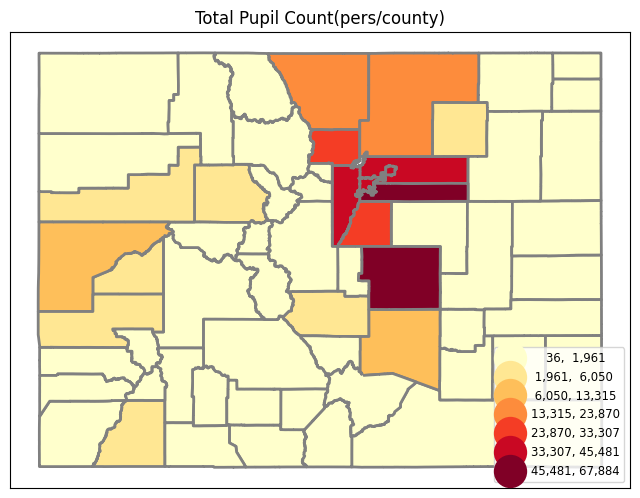

In [ ]:
#your first thematic map! :) lets unpack options real quick esp fmt for dec pts; more later under 'bells and whistles'
fig, ax = plt.subplots(1, figsize=(8,10))
a2.plot(ax=ax,column='Total Pupil Count',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=7,
         edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':2.4}) #
#leg1 = ax.get_legend()
#leg1.set_title('''Population Density
#2010 (pers/sq mi)''')
ax.title.set_text("Total Pupil Count(pers/county)")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

In [ ]:
!wget -q -O col.zip  https://github.com/beryl09/beryl09/raw/main/Population%20by%20Race_Ethnicity%20and%20Age%202020%20Counties.xlsx
#zip_ref = zipfile.ZipFile('col.zip', 'r');zip_ref.extractall(); zip_ref.close()

In [ ]:
colc.dtypes  #with geopandas can do stuff like with pandas :)

OBJECTID        int64
COUNTY         object
FULL           object
LABEL          object
CNTY_FIPS      object
NUM_FIPS        int64
CENT_LAT      float64
CENT_LONG     float64
US_FIPS        object
geometry     geometry
dtype: object

In [ ]:
data_var =['COLORADO TOTAL POPULATION']

In [ ]:
sch=pd.read_excel('/content/schools.xlsx') #load the schools xlsx file

In [ ]:
sch.head(12)

,County Name,Organization Code,Organization Name,School Code,School Name / Category (include or exclude alternative schools),Total Pupil Count,Total Dropouts,Total Dropout Rate,Female Total Pupil Count,Female Total Dropouts,...,Two or More Races Pupil Count,Two or More Races Dropouts,Two or More Races Dropout Rate,Two or More Races Female Pupil Count,Two or More Races Female Dropouts,Two or More Races Female Dropout Rate,Two or More Races Male Pupil Count,Two or More Races Male Dropouts,Two or More Races Male Dropout Rate,School Closed Note
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,9999.0,STATE TOTAL,9999,STATE GRAND TOTALS (ALTERNATIVE SCHOOLS ONLY),29647.0,4990.0,0.168,14037.0,2222.0,...,1231.0,211.0,0.171,609.0,102.0,0.167,622.0,109.0,0.175,
2,,9999.0,STATE TOTAL,9999,STATE GRAND TOTALS (EXCLUDING ALTERNATIVE SCHO...,446579.0,5534.0,0.012,218286.0,2132.0,...,20319.0,256.0,0.013,9973.0,91.0,0.009,10346.0,165.0,0.016,
3,,9999.0,STATE TOTAL,9999,STATE GRAND TOTALS (INCLUDING ALTERNATIVE SCHO...,476226.0,10524.0,0.022,232323.0,4354.0,...,21550.0,467.0,0.022,10582.0,193.0,0.018,10968.0,274.0,0.025,
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ADAMS,10.0,Mapleton 1,0187,Mapleton Expeditionary School of the Arts,709.0,15.0,0.021,379.0,6.0,...,24.0,0.0,0.000,17.0,0.0,0.000,7.0,0.0,0.000,
6,ADAMS,10.0,Mapleton 1,0212,Mapleton Early College High School,310.0,7.0,0.023,174.0,2.0,...,7.0,1.0,0.143,1.0,0.0,0.000,6.0,1.0,0.167,
7,ADAMS,10.0,Mapleton 1,0263,Global Leadership Academy,386.0,17.0,0.044,204.0,8.0,...,4.0,0.0,0.000,3.0,0.0,0.000,1.0,0.0,0.000,
8,ADAMS,10.0,Mapleton 1,0309,Academy High School,543.0,20.0,0.037,235.0,4.0,...,7.0,0.0,0.000,3.0,0.0,0.000,4.0,0.0,0.000,
9,ADAMS,10.0,Mapleton 1,0501,Monterey Community School,113.0,0.0,0.000,61.0,0.0,...,1.0,0.0,0.000,0.0,0.0,0.000,1.0,0.0,0.000,


In [ ]:
sch['School Name / Category (include or exclude alternative schools)'].value_counts()

DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE SCHOOLS)    185
DISTRICT GRAND TOTALS (EXCLUDING ALTERNATIVE SCHOOLS)    185
DISTRICT GRAND TOTALS (ALTERNATIVE SCHOOLS ONLY)         185
SUMMER SCHOOL DROPOUTS (NONE)                            177
SUMMER SCHOOL DROPOUTS                                     8
                                                        ... 
Dora Moore ECE-8 School                                    1
Morey Middle School                                        1
Noel Community Arts School                                 1
North High School Engagement Center                        1
Yampah Mountain School                                     1
Name: School Name / Category (include or exclude alternative schools), Length: 979, dtype: int64

In [ ]:
Totschdropout=sch[sch['School Name / Category (include or exclude alternative schools)']=='DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE SCHOOLS)']

In [ ]:
Totschdropout

,County Name,Organization Code,Organization Name,School Code,School Name / Category (include or exclude alternative schools),Total Pupil Count,Total Dropouts,Total Dropout Rate,Female Total Pupil Count,Female Total Dropouts,...,Two or More Races Pupil Count,Two or More Races Dropouts,Two or More Races Dropout Rate,Two or More Races Female Pupil Count,Two or More Races Female Dropouts,Two or More Races Female Dropout Rate,Two or More Races Male Pupil Count,Two or More Races Male Dropouts,Two or More Races Male Dropout Rate,School Closed Note
22,ADAMS,10.0,Mapleton 1,9998,DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE S...,5547.0,159.0,0.029,2821.0,76.0,...,176.0,7.0,0.040,91.0,4.0,0.044,85.0,3.0,0.035,
48,ADAMS,20.0,Adams 12 Five Star Schools,9998,DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE S...,19532.0,482.0,0.025,9424.0,173.0,...,841.0,8.0,0.010,421.0,2.0,0.005,420.0,6.0,0.014,
56,ADAMS,30.0,Adams County 14,9998,DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE S...,3432.0,247.0,0.072,1638.0,88.0,...,25.0,2.0,0.080,7.0,0.0,0.000,18.0,2.0,0.111,
76,ADAMS,40.0,School District 27J,9998,DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE S...,10341.0,135.0,0.013,5072.0,58.0,...,357.0,5.0,0.014,174.0,3.0,0.017,183.0,2.0,0.011,
82,ADAMS,50.0,Bennett 29J,9998,DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE S...,693.0,6.0,0.009,332.0,1.0,...,39.0,0.0,0.000,18.0,0.0,0.000,21.0,0.0,0.000,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,COLORADO BOCS,9035.0,Centennial BOCES,9998,DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE S...,210.0,77.0,0.367,84.0,29.0,...,3.0,2.0,0.667,1.0,0.0,0.000,2.0,2.0,1.000,
1704,COLORADO BOCS,9050.0,San Juan BOCES,9998,DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE S...,80.0,0.0,0.000,44.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.000,
1709,COLORADO BOCS,9130.0,Expeditionary BOCES,9998,DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE S...,192.0,0.0,0.000,81.0,0.0,...,15.0,0.0,0.000,5.0,0.0,0.000,10.0,0.0,0.000,
1721,COLORADO BOCS,9170.0,Education reEnvisioned BOCES,9998,DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE S...,3368.0,108.0,0.032,1770.0,50.0,...,231.0,8.0,0.035,113.0,1.0,0.009,118.0,7.0,0.059,


In [ ]:
Totschdropout.groupby('County Name').agg(sum)

<ipython-input-92-6c0744a2f61b>:1: FutureWarning: The operation <built-in function sum> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  Totschdropout.groupby('County Name').agg(sum)


,Organization Code,Total Pupil Count,Total Dropouts,Total Dropout Rate,Female Total Pupil Count,Female Total Dropouts,Female Total Dropout Rate,Total Male Pupil Count,Total Male Dropouts,Total Male Dropout Rate,...,Native Hawaiian or Other Pacific Islander Male Dropout Rate,Two or More Races Pupil Count,Two or More Races Dropouts,Two or More Races Dropout Rate,Two or More Races Female Pupil Count,Two or More Races Female Dropouts,Two or More Races Female Dropout Rate,Two or More Races Male Pupil Count,Two or More Races Male Dropouts,Two or More Races Male Dropout Rate
County Name,,,,,,,,,,,,,,,,,,,,,
ADAMS,280.0,44832.0,1185.0,0.188,21847.0,464.0,0.152,22985.0,721.0,0.221,...,0.083,1550.0,26.0,0.221,764.0,10.0,0.089,786.0,16.0,0.291
ALAMOSA,210.0,1267.0,21.0,0.019,601.0,11.0,0.021,666.0,10.0,0.017,...,0.000,30.0,2.0,0.080,11.0,0.0,0.000,19.0,2.0,0.125
ARAPAHOE,1053.0,66418.0,947.0,0.146,32368.0,384.0,0.118,34050.0,563.0,0.166,...,0.113,3534.0,57.0,0.138,1749.0,24.0,0.123,1785.0,33.0,0.157
ARCHULETA,220.0,919.0,9.0,0.010,439.0,5.0,0.011,480.0,4.0,0.008,...,0.000,24.0,0.0,0.000,14.0,0.0,0.000,10.0,0.0,0.000
BACA,1250.0,317.0,5.0,0.053,158.0,1.0,0.029,159.0,4.0,0.069,...,0.000,10.0,0.0,0.000,5.0,0.0,0.000,5.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SUMMIT,3000.0,1825.0,14.0,0.008,838.0,5.0,0.006,987.0,9.0,0.009,...,0.000,61.0,1.0,0.016,25.0,0.0,0.000,36.0,1.0,0.028
TELLER,6030.0,1304.0,21.0,0.031,614.0,6.0,0.028,690.0,15.0,0.034,...,0.000,44.0,0.0,0.000,22.0,0.0,0.000,22.0,0.0,0.000
WASHINGTON,15250.0,465.0,4.0,0.030,211.0,2.0,0.035,254.0,2.0,0.025,...,0.000,6.0,0.0,0.000,4.0,0.0,0.000,2.0,0.0,0.000


In [ ]:
Totschdropout


,County Name,Organization Code,Organization Name,School Code,School Name / Category (include or exclude alternative schools),Total Pupil Count,Total Dropouts,Total Dropout Rate,Female Total Pupil Count,Female Total Dropouts,...,Two or More Races Pupil Count,Two or More Races Dropouts,Two or More Races Dropout Rate,Two or More Races Female Pupil Count,Two or More Races Female Dropouts,Two or More Races Female Dropout Rate,Two or More Races Male Pupil Count,Two or More Races Male Dropouts,Two or More Races Male Dropout Rate,School Closed Note
22,ADAMS,10.0,Mapleton 1,9998,DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE S...,5547.0,159.0,0.029,2821.0,76.0,...,176.0,7.0,0.040,91.0,4.0,0.044,85.0,3.0,0.035,
48,ADAMS,20.0,Adams 12 Five Star Schools,9998,DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE S...,19532.0,482.0,0.025,9424.0,173.0,...,841.0,8.0,0.010,421.0,2.0,0.005,420.0,6.0,0.014,
56,ADAMS,30.0,Adams County 14,9998,DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE S...,3432.0,247.0,0.072,1638.0,88.0,...,25.0,2.0,0.080,7.0,0.0,0.000,18.0,2.0,0.111,
76,ADAMS,40.0,School District 27J,9998,DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE S...,10341.0,135.0,0.013,5072.0,58.0,...,357.0,5.0,0.014,174.0,3.0,0.017,183.0,2.0,0.011,
82,ADAMS,50.0,Bennett 29J,9998,DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE S...,693.0,6.0,0.009,332.0,1.0,...,39.0,0.0,0.000,18.0,0.0,0.000,21.0,0.0,0.000,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,COLORADO BOCS,9035.0,Centennial BOCES,9998,DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE S...,210.0,77.0,0.367,84.0,29.0,...,3.0,2.0,0.667,1.0,0.0,0.000,2.0,2.0,1.000,
1704,COLORADO BOCS,9050.0,San Juan BOCES,9998,DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE S...,80.0,0.0,0.000,44.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.000,
1709,COLORADO BOCS,9130.0,Expeditionary BOCES,9998,DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE S...,192.0,0.0,0.000,81.0,0.0,...,15.0,0.0,0.000,5.0,0.0,0.000,10.0,0.0,0.000,
1721,COLORADO BOCS,9170.0,Education reEnvisioned BOCES,9998,DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE S...,3368.0,108.0,0.032,1770.0,50.0,...,231.0,8.0,0.035,113.0,1.0,0.009,118.0,7.0,0.059,


In [ ]:
Totschdropout.dtypes

County Name                                                         object
Organization Code                                                  float64
Organization Name                                                   object
School Code                                                         object
School Name / Category (include or exclude alternative schools)     object
                                                                    ...   
Two or More Races Female Dropout Rate                              float64
Two or More Races Male Pupil Count                                 float64
Two or More Races Male Dropouts                                    float64
Two or More Races Male Dropout Rate                                float64
School Closed Note                                                  object
Length: 78, dtype: object

In [ ]:
Totschdropout = Totschdropout[['County Name', 'Two or More Races Male Pupil Count', 'Two or More Races Male Dropout Rate']]
Totschdropout = Totschdropout.iloc[1:,:]
Totschdropout

,County Name,Two or More Races Male Pupil Count,Two or More Races Male Dropout Rate
48,ADAMS,420.0,0.014
56,ADAMS,18.0,0.111
76,ADAMS,183.0,0.011
82,ADAMS,21.0,0.000
89,ADAMS,13.0,0.077
...,...,...,...
1699,COLORADO BOCS,2.0,1.000
1704,COLORADO BOCS,0.0,0.000
1709,COLORADO BOCS,10.0,0.000
1721,COLORADO BOCS,118.0,0.059


In [ ]:
Totschdropout.groupby('County Name').agg(sum)
Totschdropout

,Two or More Races Male Pupil Count,Two or More Races Male Dropout Rate
County Name,,
ADAMS,701.0,0.256
ALAMOSA,19.0,0.125
ARAPAHOE,1785.0,0.157
ARCHULETA,10.0,0.000
BACA,5.0,0.000
...,...,...
SUMMIT,36.0,0.028
TELLER,22.0,0.000
WASHINGTON,2.0,0.000


,County Name,Two or More Races Male Pupil Count,Two or More Races Male Dropout Rate
48,ADAMS,420.0,0.014
56,ADAMS,18.0,0.111
76,ADAMS,183.0,0.011
82,ADAMS,21.0,0.000
89,ADAMS,13.0,0.077
...,...,...,...
1699,COLORADO BOCS,2.0,1.000
1704,COLORADO BOCS,0.0,0.000
1709,COLORADO BOCS,10.0,0.000
1721,COLORADO BOCS,118.0,0.059


In [ ]:
Totschdropout.dtypes

County Name                             object
Two or More Races Male Pupil Count     float64
Two or More Races Male Dropout Rate    float64
dtype: object

In [ ]:
Totschdropout

,County Name,Two or More Races Male Pupil Count,Two or More Races Male Dropout Rate
48,ADAMS,420.0,0.014
56,ADAMS,18.0,0.111
76,ADAMS,183.0,0.011
82,ADAMS,21.0,0.000
89,ADAMS,13.0,0.077
...,...,...,...
1699,COLORADO BOCS,2.0,1.000
1704,COLORADO BOCS,0.0,0.000
1709,COLORADO BOCS,10.0,0.000
1721,COLORADO BOCS,118.0,0.059


In [ ]:
#merge
colc = pd.merge(
    left=colc,
    right=Totschdropout,
    left_on='COUNTY',
    right_on='County Name',
    how='outer'
)


In [ ]:
colc.dtypes

OBJECTID                                float64
COUNTY                                   object
FULL                                     object
LABEL                                    object
CNTY_FIPS                                object
NUM_FIPS                                float64
CENT_LAT                                float64
CENT_LONG                               float64
US_FIPS                                  object
geometry                               geometry
County Name                              object
Two or More Races Male Pupil Count      float64
Two or More Races Male Dropout Rate     float64
dtype: object

In [ ]:
#a3=schdropout.groupby('County Name').agg(sum)

In [ ]:
#a4=pd.merge(colc,a3,left_on='COUNTY',right_on='County Name',indicator=True)

<Axes: >

[]

[]

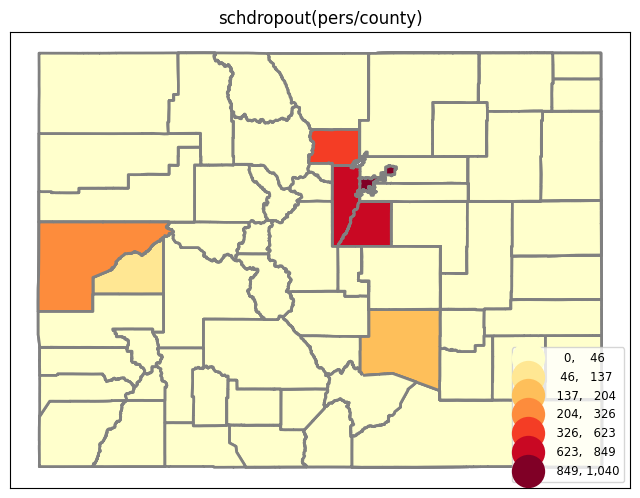

In [ ]:
#your first thematic map! :) lets unpack options real quick esp fmt for dec pts; more later under 'bells and whistles'
fig, ax = plt.subplots(1, figsize=(8,10))
colc.plot(ax=ax,column='Two or More Races Male Pupil Count',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=7,
         edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':2.4}) #
#leg1 = ax.get_legend()
#leg1.set_title('''Population Density
#2010 (pers/sq mi)''')
ax.title.set_text("schdropout(pers/county)")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

PS3

In [ ]:
colc.dtypes

OBJECTID                                float64
COUNTY                                   object
FULL                                     object
LABEL                                    object
CNTY_FIPS                                object
NUM_FIPS                                float64
CENT_LAT                                float64
CENT_LONG                               float64
US_FIPS                                  object
geometry                               geometry
County Name                              object
Two or More Races Male Pupil Count      float64
Two or More Races Male Dropout Rate     float64
dtype: object

**Overlay and side-by side**

<Axes: >

[]

[]

<Axes: >

[]

[]

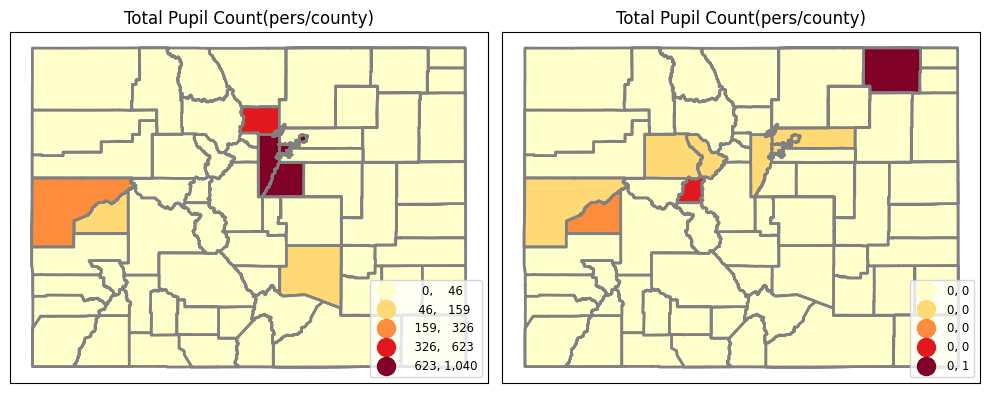

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(10,10),sharey=True, tight_layout=True)
colc.plot(ax=axs[0],column='Two or More Races Male Pupil Count',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[0].title.set_text("Total Pupil Count(pers/county)")
axs[0].set_xticks([]); axs[0].set_yticks([])

colc.plot(ax=axs[1],column='Two or More Races Male Dropout Rate',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[1].title.set_text("Total Pupil Count(pers/county)")
axs[1].set_xticks([]); axs[0].set_yticks([])

#colc.plot(ax=axs[1],column='Two or More Races Male Pupil Count',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         #edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        #'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
#axs[1].title.set_text("schdropout(pers/county)")
#axs[1].set_xticks([]); axs[1].set_yticks([])

<Axes: >

<Axes: >

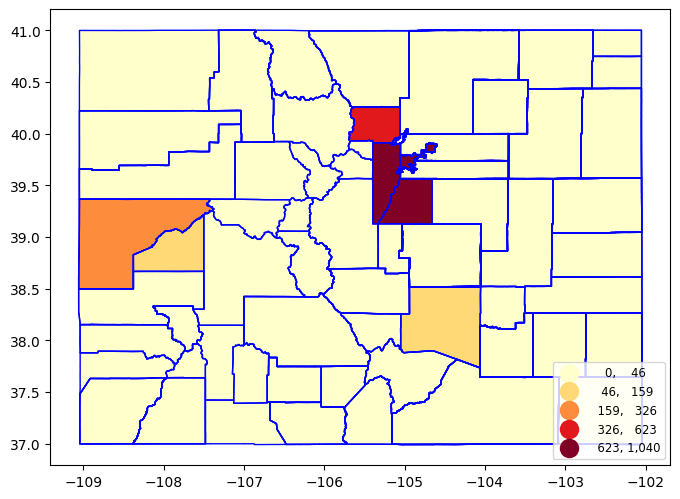

In [ ]:
fig, ax = plt.subplots(1, figsize=(8,10))
colc.plot(ax=ax,column='Two or More Races Male Pupil Count',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4})
colc.plot(ax=ax,edgecolor='blue',linewidth=1, facecolor="none") #alpha=0.1)

In [ ]:
colc.COUNTY

0         LARIMER
1         LARIMER
2         LARIMER
3      LAS ANIMAS
4      LAS ANIMAS
          ...    
180           NaN
181           NaN
182           NaN
183           NaN
184           NaN
Name: COUNTY, Length: 185, dtype: object

In [ ]:
colc.dtypes

OBJECTID                                float64
COUNTY                                   object
FULL                                     object
LABEL                                    object
CNTY_FIPS                                object
NUM_FIPS                                float64
CENT_LAT                                float64
CENT_LONG                               float64
US_FIPS                                  object
geometry                               geometry
County Name                              object
Two or More Races Male Pupil Count      float64
Two or More Races Male Dropout Rate     float64
dtype: object

In [ ]:
colc_adams_arv= colc.query("COUNTY=='ADAMS' | COUNTY=='ARVADA '")

<Axes: >

<Axes: >

'\n/   - diagonal hatching\n\\   - back diagonal\n|   - vertical\n-   - horizontal\n+   - crossed\nx   - crossed diagonal\no   - small circle\nO   - large circle\n.   - dots\n*   - stars\n'

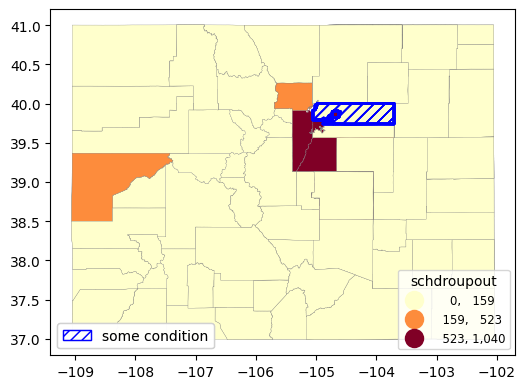

In [ ]:
fig, ax = plt.subplots(1, figsize=(6,10))
colc.plot(ax=ax,column='Two or More Races Male Pupil Count',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=3,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

#just like subset and hash or dot
#njC_cam_cum.plot(ax=ax,edgecolor='blue',linewidth=2, facecolor="none",alpha=1)
#njC_cam_cum.plot(ax=ax,edgecolor='blue',linewidth=2, facecolor="none",alpha=1,hatch='/')
colc_adams_arv.plot(ax=ax,edgecolor='blue',linewidth=2, facecolor="none",alpha=1,hatch='///')
'''
/   - diagonal hatching
\   - back diagonal
|   - vertical
-   - horizontal
+   - crossed
x   - crossed diagonal
o   - small circle
O   - large circle
.   - dots
*   - stars
'''

l1 = ax.get_legend()
l1.set_title('''schdroupout''')

import matplotlib.patches as mpatches

bluePatch = mpatches.Patch(edgecolor='blue', facecolor='none',
                     hatch='///', label=r'some condition')

l2=plt.legend(handles=[bluePatch],loc='lower left')

ax.add_artist(l2)
ax.add_artist(l1)


#njC.plot(ax=ax,edgecolor='blue',linewidth=1, facecolor="none") #alpha=0.1)

<Axes: >

[]

[]

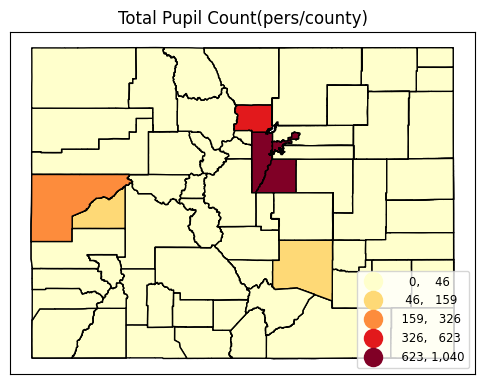

In [ ]:
fig, ax = plt.subplots(1, figsize=(6,10))
colc.plot(ax=ax,column='Two or More Races Male Pupil Count',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 200) #
ax.title.set_text("Total Pupil Count(pers/county)")
ax.set_xticks([]); ax.set_yticks([])

In [ ]:
colP = colc.copy()

colP["geometry"] = colP["geometry"].centroid

<ipython-input-130-473850ea7d21>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  colP["geometry"] = colP["geometry"].centroid


In [ ]:
colP.head(3)

,OBJECTID,COUNTY,FULL,LABEL,CNTY_FIPS,NUM_FIPS,CENT_LAT,CENT_LONG,US_FIPS,geometry,County Name,Two or More Races Male Pupil Count,Two or More Races Male Dropout Rate
0,1.0,LARIMER,Larimer County,Larimer,069,69.0,40.666413,-105.461155,08069,POINT (-105.46116 40.66641),LARIMER,326.0,0.015
1,1.0,LARIMER,Larimer County,Larimer,069,69.0,40.666413,-105.461155,08069,POINT (-105.46116 40.66641),LARIMER,137.0,0.022
2,1.0,LARIMER,Larimer County,Larimer,069,69.0,40.666413,-105.461155,08069,POINT (-105.46116 40.66641),LARIMER,3.0,0.000


<Axes: >

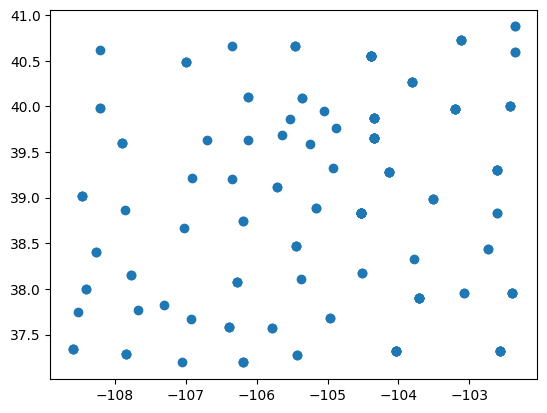

In [ ]:
colP.plot()

Text(-105.46115548980012, 40.66641349770813, 'LARIMER')

Text(-105.46115548980012, 40.66641349770813, 'LARIMER')

Text(-105.46115548980012, 40.66641349770813, 'LARIMER')

Text(-104.03871637705168, 37.315850809856926, 'LAS ANIMAS')

Text(-104.03871637705168, 37.315850809856926, 'LAS ANIMAS')

Text(-104.03871637705168, 37.315850809856926, 'LAS ANIMAS')

Text(-104.03871637705168, 37.315850809856926, 'LAS ANIMAS')

Text(-104.03871637705168, 37.315850809856926, 'LAS ANIMAS')

Text(-104.03871637705168, 37.315850809856926, 'LAS ANIMAS')

Text(-105.43965706803802, 38.47297246255305, 'FREMONT')

Text(-105.43965706803802, 38.47297246255305, 'FREMONT')

Text(-105.43965706803802, 38.47297246255305, 'FREMONT')

Text(-107.0317001099653, 38.666797711104735, 'GUNNISON')

Text(-106.1916286181029, 37.20069644255063, 'CONEJOS')

Text(-106.1916286181029, 37.20069644255063, 'CONEJOS')

Text(-106.1916286181029, 37.20069644255063, 'CONEJOS')

Text(-106.69529923763477, 39.62782564739979, 'EAGLE')

Text(-103.71644567833245, 37.90270171917909, 'OTERO')

Text(-103.71644567833245, 37.90270171917909, 'OTERO')

Text(-103.71644567833245, 37.90270171917909, 'OTERO')

Text(-103.71644567833245, 37.90270171917909, 'OTERO')

Text(-103.71644567833245, 37.90270171917909, 'OTERO')

Text(-103.71644567833245, 37.90270171917909, 'OTERO')

Text(-107.84333549404869, 37.286558192167995, 'LA PLATA')

Text(-107.84333549404869, 37.286558192167995, 'LA PLATA')

Text(-107.84333549404869, 37.286558192167995, 'LA PLATA')

Text(-106.11637902444116, 39.63417044607419, 'SUMMIT')

Text(-105.36747178347522, 38.10867789893694, 'CUSTER')

Text(-106.9165777659542, 39.21710577119511, 'PITKIN')

Text(-103.7848256603325, 38.326661065525684, 'CROWLEY')

Text(-102.60339581229903, 38.82793972435137, 'CHEYENNE')

Text(-102.60339581229903, 38.82793972435137, 'CHEYENNE')

Text(-103.07170457865058, 37.95508557335066, 'BENT')

Text(-103.07170457865058, 37.95508557335066, 'BENT')

Text(-104.33793521991743, 39.87363357874254, 'ADAMS')

Text(-104.33793521991743, 39.87363357874254, 'ADAMS')

Text(-104.33793521991743, 39.87363357874254, 'ADAMS')

Text(-104.33793521991743, 39.87363357874254, 'ADAMS')

Text(-104.33793521991743, 39.87363357874254, 'ADAMS')

Text(-104.33793521991743, 39.87363357874254, 'ADAMS')

Text(-104.13589160796826, 39.28656012359368, 'ELBERT')

Text(-104.13589160796826, 39.28656012359368, 'ELBERT')

Text(-104.13589160796826, 39.28656012359368, 'ELBERT')

Text(-104.13589160796826, 39.28656012359368, 'ELBERT')

Text(-104.13589160796826, 39.28656012359368, 'ELBERT')

Text(-102.42422632485443, 40.00289933021395, 'YUMA')

Text(-102.42422632485443, 40.00289933021395, 'YUMA')

Text(-102.42422632485443, 40.00289933021395, 'YUMA')

Text(-102.42422632485443, 40.00289933021395, 'YUMA')

Text(-106.34483773129155, 39.20237947245436, 'LAKE')

Text(-107.86287686701995, 38.861373772698435, 'DELTA')

Text(-105.42826937221812, 37.27809647878283, 'COSTILLA')

Text(-105.42826937221812, 37.27809647878283, 'COSTILLA')

Text(-107.90395367789407, 39.59930662243108, 'GARFIELD')

Text(-107.90395367789407, 39.59930662243108, 'GARFIELD')

Text(-107.90395367789407, 39.59930662243108, 'GARFIELD')

Text(-103.80982132355008, 40.26270700743742, 'MORGAN')

Text(-103.80982132355008, 40.26270700743742, 'MORGAN')

Text(-103.80982132355008, 40.26270700743742, 'MORGAN')

Text(-103.80982132355008, 40.26270700743742, 'MORGAN')

Text(-102.39334899613554, 37.955183197732495, 'PROWERS')

Text(-102.39334899613554, 37.955183197732495, 'PROWERS')

Text(-102.39334899613554, 37.955183197732495, 'PROWERS')

Text(-102.39334899613554, 37.955183197732495, 'PROWERS')

Text(-108.59671297044125, 37.338413765858164, 'MONTEZUMA')

Text(-108.59671297044125, 37.338413765858164, 'MONTEZUMA')

Text(-108.59671297044125, 37.338413765858164, 'MONTEZUMA')

Text(-106.92409464587182, 37.668995682939226, 'MINERAL')

Text(-103.51396535270298, 38.98806853941787, 'LINCOLN')

Text(-103.51396535270298, 38.98806853941787, 'LINCOLN')

Text(-103.51396535270298, 38.98806853941787, 'LINCOLN')

Text(-105.25047224636279, 39.58642247901514, 'JEFFERSON')

Text(-108.2172083327243, 39.97984112148007, 'RIO BLANCO')

Text(-108.2172083327243, 39.97984112148007, 'RIO BLANCO')

Text(-102.35179119902021, 40.87590497269919, 'SEDGWICK')

Text(-102.35179119902021, 40.87590497269919, 'SEDGWICK')

Text(-108.40584624267545, 38.00374472116248, 'SAN MIGUEL')

Text(-108.40584624267545, 38.00374472116248, 'SAN MIGUEL')

Text(-105.7882866068208, 37.57289244857266, 'ALAMOSA')

Text(-105.7882866068208, 37.57289244857266, 'ALAMOSA')

Text(-102.35757960967669, 40.59388432245019, 'PHILLIPS')

Text(-102.35757960967669, 40.59388432245019, 'PHILLIPS')

Text(-107.76931688490227, 38.155497235804134, 'OURAY')

Text(-107.76931688490227, 38.155497235804134, 'OURAY')

Text(-108.46645073724848, 39.01827889357677, 'MESA')

Text(-108.46645073724848, 39.01827889357677, 'MESA')

Text(-108.46645073724848, 39.01827889357677, 'MESA')

Text(-106.28155554415723, 38.08055271701166, 'SAGUACHE')

Text(-106.28155554415723, 38.08055271701166, 'SAGUACHE')

Text(-106.28155554415723, 38.08055271701166, 'SAGUACHE')

Text(-104.92956081208523, 39.32972341540068, 'DOUGLAS')

Text(-108.51722121935228, 37.751597708249705, 'DOLORES')

Text(-106.38321046502263, 37.58252275015132, 'RIO GRANDE')

Text(-106.38321046502263, 37.58252275015132, 'RIO GRANDE')

Text(-106.38321046502263, 37.58252275015132, 'RIO GRANDE')

Text(-104.51284681094522, 38.1734238817294, 'PUEBLO')

Text(-104.51284681094522, 38.1734238817294, 'PUEBLO')

Text(-102.60288742429846, 39.30544132695207, 'KIT CARSON')

Text(-102.60288742429846, 39.30544132695207, 'KIT CARSON')

Text(-102.60288742429846, 39.30544132695207, 'KIT CARSON')

Text(-102.60288742429846, 39.30544132695207, 'KIT CARSON')

Text(-102.60288742429846, 39.30544132695207, 'KIT CARSON')

Text(-102.5604691970416, 37.319183106011444, 'BACA')

Text(-102.5604691970416, 37.319183106011444, 'BACA')

Text(-102.5604691970416, 37.319183106011444, 'BACA')

Text(-102.5604691970416, 37.319183106011444, 'BACA')

Text(-102.5604691970416, 37.319183106011444, 'BACA')

Text(-106.11835833789074, 40.10261493495462, 'GRAND')

Text(-106.11835833789074, 40.10261493495462, 'GRAND')

Text(-103.110102751305, 40.724678106971716, 'LOGAN')

Text(-103.110102751305, 40.724678106971716, 'LOGAN')

Text(-103.110102751305, 40.724678106971716, 'LOGAN')

Text(-103.110102751305, 40.724678106971716, 'LOGAN')

Text(-105.64435901541923, 39.68910239874445, 'CLEAR CREEK')

Text(-108.20729834672, 40.61842518944677, 'MOFFAT')

Text(-105.1618263961577, 38.88217206883591, 'TELLER')

Text(-105.1618263961577, 38.88217206883591, 'TELLER')

Text(-105.35774195137822, 40.092473918064975, 'BOULDER')

Text(-105.35774195137822, 40.092473918064975, 'BOULDER')

Text(-102.74035824895562, 38.432682402403096, 'KIOWA')

Text(-102.74035824895562, 38.432682402403096, 'KIOWA')

Text(-106.19406666505965, 38.74690308548142, 'CHAFFEE')

Text(-106.19406666505965, 38.74690308548142, 'CHAFFEE')

Text(-107.30031175682645, 37.82134157503374, 'HINSDALE')

Text(-106.34279469116667, 40.666432688878714, 'JACKSON')

Text(-104.39252543760426, 40.55483961256749, 'WELD')

Text(-104.39252543760426, 40.55483961256749, 'WELD')

Text(-104.39252543760426, 40.55483961256749, 'WELD')

Text(-104.39252543760426, 40.55483961256749, 'WELD')

Text(-104.39252543760426, 40.55483961256749, 'WELD')

Text(-104.39252543760426, 40.55483961256749, 'WELD')

Text(-104.39252543760426, 40.55483961256749, 'WELD')

Text(-104.39252543760426, 40.55483961256749, 'WELD')

Text(-104.39252543760426, 40.55483961256749, 'WELD')

Text(-104.39252543760426, 40.55483961256749, 'WELD')

Text(-104.39252543760426, 40.55483961256749, 'WELD')

Text(-104.39252543760426, 40.55483961256749, 'WELD')

Text(-107.67614724838865, 37.764043165006015, 'SAN JUAN')

Text(-108.2693558325689, 38.40218471172777, 'MONTROSE')

Text(-108.2693558325689, 38.40218471172777, 'MONTROSE')

Text(-105.05279824460962, 39.954180918261706, 'BROOMFIELD')

Text(-103.201252898091, 39.97106178907796, 'WASHINGTON')

Text(-103.201252898091, 39.97106178907796, 'WASHINGTON')

Text(-103.201252898091, 39.97106178907796, 'WASHINGTON')

Text(-103.201252898091, 39.97106178907796, 'WASHINGTON')

Text(-103.201252898091, 39.97106178907796, 'WASHINGTON')

Text(-106.99119318925345, 40.48506794652031, 'ROUTT')

Text(-106.99119318925345, 40.48506794652031, 'ROUTT')

Text(-106.99119318925345, 40.48506794652031, 'ROUTT')

Text(-107.04832926923196, 37.193596314600825, 'ARCHULETA')

Text(-105.52253147641498, 39.85755812968615, 'GILPIN')

Text(-104.87636530269464, 39.76202837962132, 'DENVER')

Text(-105.7171746102545, 39.11930278017876, 'PARK')

Text(-105.7171746102545, 39.11930278017876, 'PARK')

Text(-104.52558327617145, 38.8320927200302, 'EL PASO')

Text(-104.52558327617145, 38.8320927200302, 'EL PASO')

Text(-104.52558327617145, 38.8320927200302, 'EL PASO')

Text(-104.52558327617145, 38.8320927200302, 'EL PASO')

Text(-104.52558327617145, 38.8320927200302, 'EL PASO')

Text(-104.52558327617145, 38.8320927200302, 'EL PASO')

Text(-104.52558327617145, 38.8320927200302, 'EL PASO')

Text(-104.52558327617145, 38.8320927200302, 'EL PASO')

Text(-104.52558327617145, 38.8320927200302, 'EL PASO')

Text(-104.52558327617145, 38.8320927200302, 'EL PASO')

Text(-104.52558327617145, 38.8320927200302, 'EL PASO')

Text(-104.52558327617145, 38.8320927200302, 'EL PASO')

Text(-104.52558327617145, 38.8320927200302, 'EL PASO')

Text(-104.52558327617145, 38.8320927200302, 'EL PASO')

Text(-104.52558327617145, 38.8320927200302, 'EL PASO')

Text(-104.33921896061109, 39.64977248937095, 'ARAPAHOE')

Text(-104.33921896061109, 39.64977248937095, 'ARAPAHOE')

Text(-104.33921896061109, 39.64977248937095, 'ARAPAHOE')

Text(-104.33921896061109, 39.64977248937095, 'ARAPAHOE')

Text(-104.33921896061109, 39.64977248937095, 'ARAPAHOE')

Text(-104.33921896061109, 39.64977248937095, 'ARAPAHOE')

Text(-104.33921896061109, 39.64977248937095, 'ARAPAHOE')

Text(-104.96058453164343, 37.684679638816945, 'HUERFANO')

Text(-104.96058453164343, 37.684679638816945, 'HUERFANO')

Text(nan, nan, 'nan')

Text(nan, nan, 'nan')

Text(nan, nan, 'nan')

Text(nan, nan, 'nan')

Text(nan, nan, 'nan')

Text(nan, nan, 'nan')

Text(nan, nan, 'nan')

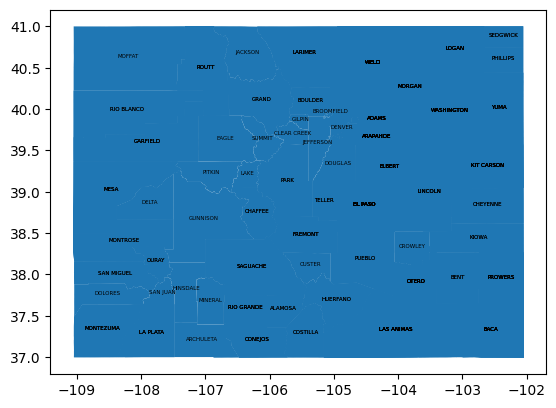

In [ ]:
ax=colc.plot() #https://stackoverflow.com/questions/38899190/geopandas-label-polygons
for x, y, label in zip(colP.geometry.x, colP.geometry.y, colP.COUNTY):
    ax.annotate(label, xy=(x, y),horizontalalignment='center', fontsize=4) #ytext=(3, 3), textcoords="offset points"

In [ ]:
#i found one and reposted on my website, download it onto colab:
! wget -q -O col-counties.zip https://github.com/beryl09/beryl09/blob/main/Marijuana_Use_in_Adults_-_CDPHE_Community_Level_Estimates_(Census_Tract).csv

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: ` wget -q -O col-counties.zip https://github.com/beryl09/beryl09/blob/main/Marijuana_Use_in_Adults_-_CDPHE_Community_Level_Estimates_(Census_Tract).csv'


In [ ]:
import pandas as pd
file_path = '/content/Marijuana_Use_in_Adults_-_CDPHE_Community_Level_Estimates_(Census_Tract).csv'
mari = pd.read_csv('/content/Marijuana_Use_in_Adults_-_CDPHE_Community_Level_Estimates_(Census_Tract).csv')


In [ ]:
mari.head((10))

,OBJECTID,Census_Tract_FIPS,Census_Tract_Name,County_Name,Adult_Population_Age18_and_over,Health_Statistics_Region,Mj_Use1_30_Census_Tract_Estimate,Mj_Use1_30_Estimate_Confidence_Interval,Mj_Use1_30_Map_Symbol_withinHSR,Mj_Use1_30_County_Regional_Estimate,Mj_Use1_30_Map_Symbol_State,Mj_Use1_30_State_Estimate
0,1,8043979000,"Census Tract 9790, Fremont County, Colorado",Fremont,2994,13,13.8,95% C.I.: 12.8 - 15.2,Lowest Quintile,County/Regional Estimate 15.5% (95% C.I.: 10.3...,Middle Quintile,State Estimate 14.0% (95% C.I.: 13.5 - 14.5)
1,2,8045951600,"Census Tract 9516, Garfield County, Colorado",Garfield,2800,12,19.4,95% C.I.: 18.2 - 20.8,Middle Quintile,County/Regional Estimate 16.7% (95% C.I.: 11.9...,Highest Quintile,State Estimate 14.0% (95% C.I.: 13.5 - 14.5)
2,3,8069002803,"Census Tract 28.03, Larimer County, Colorado",Larimer,97,2,18.8,95% C.I.: 18.2 - 19.4,Highest Quintile,County/Regional Estimate 14% (95% C.I.: 11.9 -...,Highest Quintile,State Estimate 14.0% (95% C.I.: 13.5 - 14.5)
3,4,8125963200,"Census Tract 9632, Yuma County, Colorado",Yuma,4381,1,10.0,95% C.I.: 8.8 - 13.4,Fourth Quintile,County/Regional Estimate 8.7% (95% C.I.: 0.2 -...,Lowest Quintile,State Estimate 14.0% (95% C.I.: 13.5 - 14.5)
4,5,8069002401,"Census Tract 24.01, Larimer County, Colorado",Larimer,1190,2,8.5,95% C.I.: 8.1 - 8.9,Lowest Quintile,County/Regional Estimate 14% (95% C.I.: 11.9 -...,Lowest Quintile,State Estimate 14.0% (95% C.I.: 13.5 - 14.5)
5,6,8069002402,"Census Tract 24.02, Larimer County, Colorado",Larimer,2298,2,10.3,95% C.I.: 10 - 10.7,Lowest Quintile,County/Regional Estimate 14% (95% C.I.: 11.9 -...,Lowest Quintile,State Estimate 14.0% (95% C.I.: 13.5 - 14.5)
6,7,8103951200,"Census Tract 9512, Rio Blanco County, Colorado",Rio Blanco,2080,11,6.4,95% C.I.: 5.2 - 9.9,Lowest Quintile,County/Regional Estimate 10.4% (95% C.I.: 1.7 ...,Lowest Quintile,State Estimate 14.0% (95% C.I.: 13.5 - 14.5)
7,8,8103951100,"Census Tract 9511, Rio Blanco County, Colorado",Rio Blanco,2887,11,6.8,95% C.I.: 5.8 - 9.9,Lowest Quintile,County/Regional Estimate 10.4% (95% C.I.: 1.7 ...,Lowest Quintile,State Estimate 14.0% (95% C.I.: 13.5 - 14.5)
8,9,8049000201,"Census Tract 2.01, Grand County, Colorado",Grand,4247,12,18.6,95% C.I.: 16.3 - 21.1,Middle Quintile,County/Regional Estimate 22.2% (95% C.I.: 10.3...,Highest Quintile,State Estimate 14.0% (95% C.I.: 13.5 - 14.5)
9,10,8049000202,"Census Tract 2.02, Grand County, Colorado",Grand,5788,12,20.6,95% C.I.: 17.6 - 23.8,Fourth Quintile,County/Regional Estimate 22.2% (95% C.I.: 10.3...,Highest Quintile,State Estimate 14.0% (95% C.I.: 13.5 - 14.5)


In [ ]:
mari.dtypes

OBJECTID                                     int64
Census_Tract_FIPS                            int64
Census_Tract_Name                           object
County_Name                                 object
Adult_Population_Age18_and_over              int64
Health_Statistics_Region                     int64
Mj_Use1_30_Census_Tract_Estimate           float64
Mj_Use1_30_Estimate_Confidence_Interval     object
Mj_Use1_30_Map_Symbol_withinHSR             object
Mj_Use1_30_County_Regional_Estimate         object
Mj_Use1_30_Map_Symbol_State                 object
Mj_Use1_30_State_Estimate                   object
dtype: object